# Using Support Vector Machines on iris Data

In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


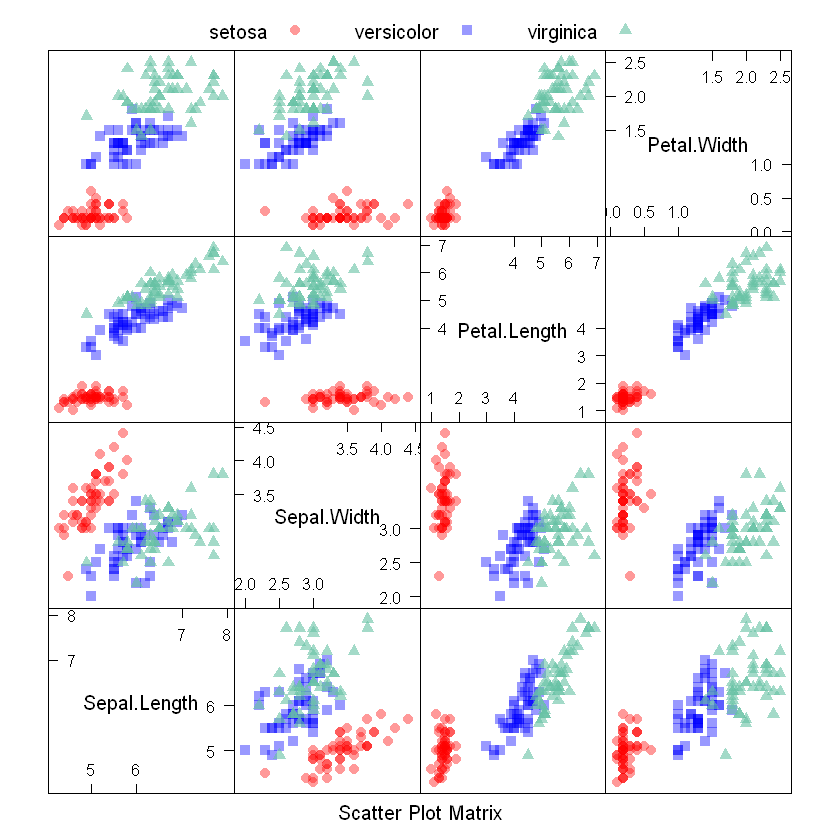

In [7]:
library(AppliedPredictiveModeling)
transparentTheme(trans = .4)
library(caret)
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

From graph abobe, we can see that versicolor and virginica are very similar to each other. And we can also see that there are some clear split bewteen theses species. So it should be good to use support vector machines of linear or radial kernal.

In [12]:
# Data pre-processing- rescale data
preProcValues <- preProcess(iris, method = c("center", "scale"))

iris_tansformed<- predict(preProcValues, iris)
head(iris_tansformed)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


In [33]:
# data splitting
trainIndex <- createDataPartition(iris_tansformed$Species, p = .8, 
                                  list = FALSE, 
                                  times = 1)
head(trainIndex)
irisTrain <- iris_tansformed[ trainIndex,]
irisTest  <- iris_tansformed[-trainIndex,]

Resample1
1
2
3
4
5
6


In [40]:
#SVM linear kernal
#tuning grid
grid <- expand.grid(C = c(0.1,0.5,1,2,4))
#samplign control
ctrl <- trainControl(method = "cv", number = 10)
#train model
svm.lm.md <- train(Species~.,data = irisTrain, method = "svmLinear", metric = "Kappa",trControl = ctrl, tuneGrid = grid)

In [41]:
#linear kernal
svm.lm.md

Support Vector Machines with Linear Kernel 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results across tuning parameters:

  C    Accuracy   Kappa 
  0.1  0.9666667  0.9500
  0.5  0.9666667  0.9500
  1.0  0.9583333  0.9375
  2.0  0.9416667  0.9125
  4.0  0.9500000  0.9250

Kappa was used to select the optimal model using the largest value.
The final value used for the model was C = 0.1.

In [27]:
#SVM radial kernal
#tuning grid
grid <- expand.grid(C = c(0.1,0.5,1,2,4),
                   sigma = c(0.01,0.1,0.5,1,2,4))
#samplign control
ctrl <- trainControl(method = "cv", number = 10)
#train model
svm.rad.md <- train(Species~.,data = irisTrain, method = "svmRadial", metric = "Kappa",trControl = ctrl, tuneGrid = grid)

In [28]:
svm.rad.md

Support Vector Machines with Radial Basis Function Kernel 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  C    sigma  Accuracy   Kappa
  0.1  0.01   0.8533333  0.78 
  0.1  0.10   0.8800000  0.82 
  0.1  0.50   0.9333333  0.90 
  0.1  1.00   0.9400000  0.91 
  0.1  2.00   0.9333333  0.90 
  0.1  4.00   0.9000000  0.85 
  0.5  0.01   0.8733333  0.81 
  0.5  0.10   0.9600000  0.94 
  0.5  0.50   0.9600000  0.94 
  0.5  1.00   0.9533333  0.93 
  0.5  2.00   0.9466667  0.92 
  0.5  4.00   0.9333333  0.90 
  1.0  0.01   0.8933333  0.84 
  1.0  0.10   0.9733333  0.96 
  1.0  0.50   0.9533333  0.93 
  1.0  1.00   0.9466667  0.92 
  1.0  2.00   0.9466667  0.92 
  1.0  4.00   0.9400000  0.91 
  2.0  0.01   0.9466667  0.92 
  2.0  0.10   0.9666667  0.95 
  2.0  0.50   0.9600000  0.94 
  2.0  1.00   0.94

Compare two models, we can get the conclusion that:   
svm with linear kernal is better for predicting iris species, it has accuracy of **96.7%**, and Kappa of **0.95**.   

Let's see its final accuracy in testing data.

In [49]:
predicted_values <- predict(svm.lm.md,newdata = irisTest)
#confusion matrix
table(predicted_values,irisTest$Species)

                
predicted_values setosa versicolor virginica
      setosa         10          0         0
      versicolor      0         10         2
      virginica       0          0         8

We only inccorrectly indentify 2 of 30 observations. So we know svm with linear model is quite accurate on identifying iris species